In [1]:
import pandas as pd
import numpy as np
import os
import rpy2.robjects as rob

use_imputation = 1 # currently only 1

eval_phenotype = 0
# 0: PET av45
# 1: CSF abeta
# 2: CSF tau
# 3: CSF ptau
        

In [2]:
# A TAB separated clmuped variant list. p<5e-5 variants, obtained from GWAS of iPSC samples.
Base_clump = pd.read_csv("/Users/yuichiro/Workspace/Genome/ADabetaQTL/genotype/20190722_AD_HC_indvselect_qc_merge_imp_QC_excludedup_namemod.clumped_tab",sep="\t")

# Imputed genotype of iPSC samples
Base_VCFfile = open("/Users/yuichiro/Workspace/Genome/ADabetaQTL/genotype/20190722_AD_HC_indvselect_qc_merge_imp_QC_excludedup_namemod.vcf", mode="r")

# A file where the results will be written.
Base_select_file = open("/Users/yuichiro/Workspace/Genome/ADabetaQTL/genotype/20190722_AD_HC_indvselect_qc_merge_imp_QC_selectedVCF_clump.txt", mode="w")
    

In [3]:
# Extract genotypes of selected variants from iPSC sample VCF and write extracted genotypes to a new file.

## skip contig lines of the VCF file.
cnt = 0
for ind in range(0,29):
    line = Base_VCFfile.readline()
    cnt = cnt+1
    
line = Base_VCFfile.readline()
GWAS_SNP_np = Base_clump["SNP"].values
while line:
    feature = line.split(sep="\t")
    if feature[2] in GWAS_SNP_np:
        if len(np.where(GWAS_SNP_np==feature[2])) == 1:
            Base_select_file.write(line)
        else:
            for ind in range(0,len(np.where(GWAS_SNP_np==feature[2]))):
                if int(feature[0]) == int(GWAS_SNPlist[GWAS_SNP_np==feature[2]][0][ind]):
                                          Base_select_file.write(line)

    cnt = cnt+1
    line = Base_VCFfile.readline()
    if cnt%100000 == 0:
        print("finished: line "+str(cnt))

Base_select_file.close()    
Base_VCFfile.close()

finished: line 100000
finished: line 200000
finished: line 300000
finished: line 400000
finished: line 500000
finished: line 600000
finished: line 700000
finished: line 800000
finished: line 900000
finished: line 1000000
finished: line 1100000
finished: line 1200000
finished: line 1300000
finished: line 1400000
finished: line 1500000
finished: line 1600000
finished: line 1700000
finished: line 1800000
finished: line 1900000
finished: line 2000000
finished: line 2100000
finished: line 2200000
finished: line 2300000
finished: line 2400000
finished: line 2500000
finished: line 2600000
finished: line 2700000
finished: line 2800000
finished: line 2900000
finished: line 3000000
finished: line 3100000
finished: line 3200000
finished: line 3300000
finished: line 3400000
finished: line 3500000
finished: line 3600000
finished: line 3700000
finished: line 3800000
finished: line 3900000
finished: line 4000000
finished: line 4100000
finished: line 4200000
finished: line 4300000
finished: line 44000

In [4]:
# Extract genotypes of selected variants from ADNI sample VCF and write extracted genotypes to a new file.

# imputed ADNI VCF file. 
Target_VCFfile = open("/Users/yuichiro/Workspace/Genome/ADabetaQTL/ADNI/WGS_Omni25_merge_imp_QC_excludedup_namemod.vcf", mode="r")
# A file where the results will be written.
Target_select_file = open("/Users/yuichiro/Workspace/Genome/ADabetaQTL/ADNI/WGS_Omni25_merge_imp_QC_selectedVCF_clump.txt", mode="w") 
    

## skip contig lines of the VCF file.
cnt = 0
for ind in range(0,29):
    line = Target_VCFfile.readline()
    cnt = cnt+1
    
line = Target_VCFfile.readline()

while line:
    feature = line.split(sep="\t")
    if feature[2] in GWAS_SNP_np:
        if len(np.where(GWAS_SNP_np==feature[2])) == 1:
            Target_select_file.write(line)
        else:
            for ind in range(0,len(np.where(GWAS_SNP_np==feature[2]))):
                if int(feature[0]) == int(GWAS_SNPlist[GWAS_SNP_np==feature[2]][0][ind]):
                                          Target_select_file.write(line)
    cnt = cnt+1
    line = Target_VCFfile.readline()
    if cnt%100000 == 0:
        print("finished: line "+str(cnt))

Target_select_file.close()    
Target_VCFfile.close()

finished: line 100000
finished: line 200000
finished: line 300000
finished: line 400000
finished: line 500000
finished: line 600000
finished: line 700000
finished: line 800000
finished: line 900000
finished: line 1000000
finished: line 1100000
finished: line 1200000
finished: line 1300000
finished: line 1400000
finished: line 1500000
finished: line 1600000
finished: line 1700000
finished: line 1800000
finished: line 1900000
finished: line 2000000
finished: line 2100000
finished: line 2200000
finished: line 2300000
finished: line 2400000
finished: line 2500000
finished: line 2600000
finished: line 2700000
finished: line 2800000
finished: line 2900000
finished: line 3000000
finished: line 3100000
finished: line 3200000
finished: line 3300000
finished: line 3400000
finished: line 3500000
finished: line 3600000
finished: line 3700000
finished: line 3800000
finished: line 3900000
finished: line 4000000
finished: line 4100000
finished: line 4200000
finished: line 4300000
finished: line 44000

In [5]:
# Re-load previously wrote files.
Base_selectedSNPlist = pd.read_csv("/Users/yuichiro/Workspace/Genome/ADabetaQTL/genotype/20190722_AD_HC_indvselect_qc_merge_imp_QC_selectedVCF_clump.txt",sep="\t",header=None)
Target_selectedSNPlist = pd.read_csv("/Users/yuichiro/Workspace/Genome/ADabetaQTL/ADNI/WGS_Omni25_merge_imp_QC_selectedVCF_clump.txt",sep="\t",header=None)

base_selected_var = Base_selectedSNPlist[2].tolist()
target_selected_var = Target_selectedSNPlist[2].tolist()

In [1]:
# loading genotypes to numpy array.
import subprocess

def genotype_format2num(geno_with_pipe_column):
    if use_imputation == 1:
        geno_with_pipe = geno_with_pipe_column.split("/")
        if geno_with_pipe[0].isdecimal() and geno_with_pipe[1].isdecimal():
            geno_num = int(geno_with_pipe[0]) + int(geno_with_pipe[1])
        else:
            geno_num = np.nan
    return geno_num
    
# load iPSC sample gentypes to numpy array
base_geno_df = Base_selectedSNPlist.loc[:,9:110].applymap(genotype_format2num) # 102 samples in iPSC data
base_geno_np = base_geno_df.values.transpose()

# load ADNI sample gentypes to numpy array
target_geno_df = Target_selectedSNPlist.loc[:,9:723].applymap(genotype_format2num) # 715 samples in ADNI data
if use_imputation == 1:
    Target_VCFfile = open("ADNI/WGS_Omni25_merge_imp_QC_excludedup_namemod.vcf", mode="r")
    
## skip contig lines of the VCF file.
cnt = 0
for ind in range(0,28):
    line = Target_VCFfile.readline()
    cnt = cnt+1
            
line = Target_VCFfile.readline()
feature = line.split(sep="\t")
target_VCFsample_list = feature[9:724]
target_VCFsample_list[714] = target_VCFsample_list[714].split(sep="\n")[0]
Target_VCFfile.close()
if eval_phenotype==0:
    target_pheno = pd.read_csv("pheno_merge_ADNI_SUVR.txt",sep="\t")
else:
    target_pheno = pd.read_csv("pheno_merge_ADNI_CSF.txt",sep="\t")
target_phenosample_list = []
cnt=0
for index, row in target_pheno.iterrows():
    target_phenosample_list.append(str(int(row["FID"]))+"_"+str(int(row["IID"])).zfill(4))
    cnt=cnt+1


target_df_keep = []
cnt=0
for samp in target_VCFsample_list:
    if samp in target_phenosample_list:
        target_df_keep.append(cnt)
    cnt = cnt+1

target_geno_df = target_geno_df.filter(target_geno_df.columns[target_df_keep], axis=1)
target_geno_np = target_geno_df.values.transpose()


NameError: name 'Base_selectedSNPlist' is not defined

(581, 3)
(581,)


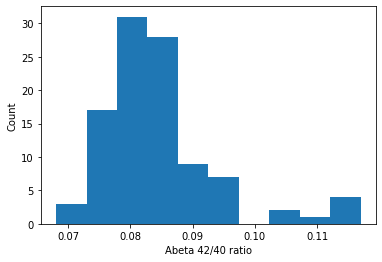

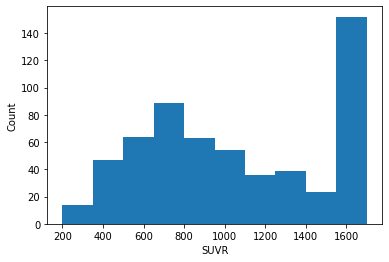

In [45]:
# loading information of covariates to numpy arrays.

import matplotlib.pyplot as plt
base_pheno = pd.read_csv("phenotype_abetaratio.txt",sep="\t")
#abetaratio_np = base_pheno["abeta42"].values
abetaratio_np = base_pheno["abeta_ratio"].values
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(abetaratio_np)
ax.set_xlabel("Abeta 42/40 ratio")
ax.set_ylabel("Count")
plt.savefig("base_distribution")

base_cov = pd.read_csv("cov_agesexAPOE.txt",sep="\t")
base_cov_np = base_cov.loc[:,"AGE":"APOEe4"].values

target_df_keep = []
cnt=0
for samp in target_phenosample_list:
    if samp in target_VCFsample_list:
        target_df_keep.append(cnt)
    cnt = cnt+1
if eval_phenotype==0:
    target_pheno = pd.read_csv("pheno_merge_ADNI_SUVR.txt",sep="\t")
else:
    target_pheno = pd.read_csv("pheno_merge_ADNI_CSF.txt",sep="\t")
target_pheno = target_pheno.loc[target_df_keep,:]

if eval_phenotype==0:
    target_pheno_np = target_pheno["AV45_bl"].values
else if eval_phenotype==1:
    target_pheno_np = target_pheno["ABETA_bl"].values
else if eval_phenotype==2:
    target_pheno_np = target_pheno["TAU_bl"].values/target_pheno["ABETA_bl"].values
else if eval_phenotype==3: 
    target_pheno_np = target_pheno["PTAU_bl"].values/target_pheno["ABETA_bl"].values

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(target_pheno_np)
ax.set_xlabel("SUVR")
ax.set_ylabel("Count")
plt.savefig("target_distribution")

if eval_phenotype==0:
    target_cov = pd.read_csv("cov_merge_ADNI_SUVR.txt",sep="\t")
else:
    target_cov = pd.read_csv("cov_merge_ADNI_CSF.txt",sep="\t")
target_cov = target_cov.loc[target_df_keep,:]
target_cov_np = target_cov.loc[:,"AGE":"APOE4"].values

print(target_cov_np.shape)
print(target_pheno_np.shape)

In [46]:
# compensate missing genotype data with mean value

if np.isnan(base_geno_np).any():
    imp = SimpleImputer(missing_values=np.nan, strategy='mean', verbose=0, copy=True)
    base_geno_np = imp.fit_transform(base_geno_np)  

base_genocov_np = np.concatenate([base_geno_np,base_cov_np],axis=1)

if np.isnan(target_geno_np).any():
    imp = SimpleImputer(missing_values=np.nan, strategy='mean', verbose=0, copy=True)
    target_geno_np = imp.fit_transform(target_geno_np)

target_genocov_np = np.concatenate([target_geno_np,target_cov_np],axis=1)
print(base_genocov_np.shape)

(102, 497)


In [47]:
## fulfill missing genotypes in target data with mean of base's

base_sampdim = base_geno_np.shape[0]
base_vardim = base_geno_np.shape[1]
target_sampdim = target_geno_np.shape[0]
target_vardim = target_geno_np.shape[1]
target_geno_basecoord = np.zeros([target_sampdim,base_vardim])
targetvar_isinbase = np.zeros([base_vardim,1])
base_cnt=0
target_cnt=0
for var in base_selected_var:
    if var in target_selected_var:
        targetvar_isinbase[base_cnt] = 1
        target_geno_basecoord[:,base_cnt] = target_geno_np[:,target_cnt]
        target_cnt = target_cnt+1
    else:
        #print(var)
        targetvar_isinbase[base_cnt] = 0
        target_geno_basecoord[:,base_cnt] = np.squeeze(np.mean(base_geno_np,axis=0)[base_cnt]*np.ones([target_sampdim,1]))
        
    base_cnt=base_cnt+1

#print(base_cnt)
#print(base_vardim)
#print(target_cnt)
#print(target_vardim)
#print(target_geno_basecoord.shape)

target_genocov_basecoord = np.concatenate([target_geno_basecoord,target_cov_np],axis=1)
(target_genocov_basecoord.shape)
targetvar_isinbase = np.squeeze(targetvar_isinbase)

In [2]:
#### Classification of Abeta postive/negative + iPSC eQTL & pca train -> ADNI pca test and model CV  %2020/5/21
## + covariate only %2020/5/23

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score
from scipy import stats
import seaborn as sns
import pickle

if eval_phenotype==0:
    Abeta_posneg_np = target_pheno_np>1.11
else if eval_phenotype==1:
    Abeta_posneg_np = (target_pheno_np<977.0)
else if eval_phenotype==2:
    Abeta_posneg_np = (target_pheno_np>0.27) #TAU
else if eval_phenotype==3:
    Abeta_posneg_np = (target_pheno_np>0.025) #pTAU
acc_summary = []
f1_summary = []
auc_summary = []
merge_tprs = []
merge_aucs = []
mean_merge_fpr = np.linspace(0, 1, 20)

cov_acc_summary = []
cov_f1_summary = []
cov_auc_summary = []
cov_merge_tprs = []
cov_merge_aucs = []

## PCA training
base_x = base_geno_np
n_components_pca = 3
scaler = StandardScaler()
base_x_scale = scaler.fit_transform(base_x)
pca = PCA(svd_solver='full', n_components = n_components_pca)
base_x_pca = pca.fit_transform(base_x_scale)
plt.plot(pca.explained_variance_ratio_,'.')

filename = 'ab_baseiPSCpc.pkl'
pickle.dump(pca, open(filename, 'wb'))

plt.figure(figsize=(10,100))
df_pcacomponent = pd.DataFrame(data=np.transpose(pca.components_[:,targetvar_isinbase==1]),columns=['PC1','PC2','PC3'],index=target_selected_var)
sns.heatmap(df_pcacomponent,cbar_kws={'label': 'Weight'})
plt.savefig("pcacomponent.png",format="png",dpi=300)

feat_importance_summary = np.zeros([10,6])

cnt = 0
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(target_geno_basecoord,Abeta_posneg_np):
    y_train, y_test = Abeta_posneg_np[train_index], Abeta_posneg_np[test_index]
    # genotype + covariate prediction model.
    x_train, x_test = target_geno_basecoord[train_index], target_geno_basecoord[test_index]
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)
    x_train_pca = np.concatenate([x_train_pca,target_cov_np[train_index]],axis=1)
    x_test_pca = np.concatenate([x_test_pca,target_cov_np[test_index]],axis=1)
    classi = RandomForestClassifier(n_estimators=100)
    classi.fit(x_train_pca, y_train)
    y_pred = classi.predict(x_test_pca)
    y_pred_prob = classi.predict_proba(x_test_pca)[:,1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1, drop_intermediate=False)
    merge_tprs.append(np.interp(mean_merge_fpr, fpr, tpr))
    merge_tprs[-1][0] = 0.0
    auc_summary = np.append(auc_summary,roc_auc_score(y_test, y_pred_prob))
    acc_summary = np.append(acc_summary,accuracy_score(y_test,y_pred))
    f1_summary = np.append(f1_summary,f1_score(y_test,y_pred))
    
    feat_importance_summary[cnt] = classi.feature_importances_
    
    filename = 'ab_classifier_'+str(cnt)+'.pkl'
    pickle.dump(classi, open(filename, 'wb'))
    cnt = cnt + 1
    
    # only covariate prediction model.
    x_train, x_test = target_cov_np[train_index], target_cov_np[test_index]
    #cov_scaler = StandardScaler()
    #x_train = cov_scaler.fit_transform(x_train)
    #x_test = cov_scaler.transform(x_test)
    cov_classi = RandomForestClassifier(n_estimators=100)
    cov_classi.fit(x_train, y_train)
    y_pred = cov_classi.predict(x_test)
    y_pred_prob = cov_classi.predict_proba(x_test)[:,1]
      
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1, drop_intermediate=False)
    cov_merge_tprs.append(np.interp(mean_merge_fpr, fpr, tpr))
    cov_merge_tprs[-1][0] = 0.0
    cov_auc_summary = np.append(cov_auc_summary,roc_auc_score(y_test, y_pred_prob))
    cov_acc_summary = np.append(cov_acc_summary,accuracy_score(y_test,y_pred))
    cov_f1_summary = np.append(cov_f1_summary,f1_score(y_test,y_pred))  
    
plt.figure(figsize=(9,4))
df_featimportance = pd.DataFrame(data=np.transpose(feat_importance_summary),columns=['Set1','Set2','Set3','Set4','Set5','Set6','Set7','Set8','Set9','Set10'],index=['PC1','PC2','PC3','AGE','SEX','APOEe4'])
sns.heatmap(df_featimportance,cbar_kws={'label': 'Importance'})
plt.savefig("feat_imporance.png",format="png",dpi=300)

## genotype + covariate
# score for ROC
merge_tprs = np.asarray(merge_tprs)
mean_merge_tpr = np.mean(merge_tprs,axis=0)
std_merge_tpr = np.std(merge_tprs,axis=0)

fig = plt.figure(figsize=(4.0, 4.0))
ax = fig.add_subplot(1, 1, 1)
ax.plot([0,1],[0,1],'r--')
ax.plot(mean_merge_fpr, mean_merge_tpr,'b-')
ax.fill_between(mean_merge_fpr,mean_merge_tpr-std_merge_tpr,mean_merge_tpr+std_merge_tpr,alpha=0.3,linewidth=1,linestyle='dashed',edgecolor='k',facecolor='b')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
#plt.savefig("ROC_results.png")
plt.savefig('ROC_results', dpi=600)
plt.show()
print(np.mean(auc_summary))
print(np.std(auc_summary))
print(auc_summary)
print(np.mean(acc_summary))
print(np.std(acc_summary))
print(acc_summary)
print(np.mean(f1_summary))
print(np.std(f1_summary))
print(f1_summary)

## only covariate
# score for ROC
cov_merge_tprs = np.asarray(cov_merge_tprs)
cov_mean_merge_tpr = np.mean(cov_merge_tprs,axis=0)
cov_std_merge_tpr = np.std(cov_merge_tprs,axis=0)

fig = plt.figure(figsize=(4.0, 4.0))
ax = fig.add_subplot(1, 1, 1)
ax.plot([0,1],[0,1],'r--')
ax.plot(mean_merge_fpr, cov_mean_merge_tpr,'b-')
ax.fill_between(mean_merge_fpr,cov_mean_merge_tpr-cov_std_merge_tpr,cov_mean_merge_tpr+cov_std_merge_tpr,alpha=0.3,linewidth=1,linestyle='dashed',edgecolor='k',facecolor='b')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
#plt.savefig("ROC_results.png")
plt.savefig('cov_ROC_results', dpi=600)
plt.show()
print(np.mean(cov_auc_summary))
print(np.std(cov_auc_summary))
print(cov_auc_summary)
print(np.mean(cov_acc_summary))
print(np.std(cov_acc_summary))
print(cov_acc_summary)
print(np.mean(cov_f1_summary))
print(np.std(cov_f1_summary))
print(cov_f1_summary)

# Wilcoxon signed-rank test
print(stats.wilcoxon(auc_summary,cov_auc_summary))

print(sum(Abeta_posneg_np))

/Users/yuichiro/Workspace/Genome/ADabetaQTL/.env/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/yuichiro/Workspace/Genome/ADabetaQTL/.env/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
plt.figure(figsize=[5,3])
plt.plot(pca.explained_variance_ratio_,'.')
plt.xlabel("PC")
plt.xticks([0,1,2],labels=["1","2","3"])
plt.ylabel("Variance ratio")
plt.savefig("PCAexpvar.png",format="png",dpi=300)

In [3]:
from mpl_toolkits.mplot3d import Axes3D
target_pca = pca.transform(target_geno_basecoord)
fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111,projection='3d')
ax.scatter(target_pca[Abeta_posneg_np==1,0],target_pca[Abeta_posneg_np==1,1],target_cov_np[Abeta_posneg_np==1,0],s=5)
ax.scatter(target_pca[Abeta_posneg_np==0,0],target_pca[Abeta_posneg_np==0,1],target_cov_np[Abeta_posneg_np==0,0],s=5)
ax.view_init(200, 60)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("AGE")
plt.savefig("pca_targetval.png",format="png",dpi=300)
print(target_pca)

NameError: name 'pca' is not defined

In [48]:
############################
# Summerize covariates 
# 2021.2.9

if eval_phenotype==0:
    Abeta_posneg_np = target_pheno_np>1.11
else if eval_phenotype==1:
    Abeta_posneg_np = (target_pheno_np<977.0)
else if eval_phenotype==2:
    Abeta_posneg_np = (target_pheno_np>0.27) #TAU
else if eval_phenotype==3:
    Abeta_posneg_np = (target_pheno_np>0.025) #pTAU
    
print(target_cov_np)

print("--------- Onset AGE ----------")
print(np.mean(target_cov_np[:,0]))
print(np.std(target_cov_np[:,0]))
print(np.mean(target_cov_np[np.where(Abeta_posneg_np==0),0]))
print(np.std(target_cov_np[np.where(Abeta_posneg_np==0),0]))
print(np.mean(target_cov_np[np.where(Abeta_posneg_np==1),0]))
print(np.std(target_cov_np[np.where(Abeta_posneg_np==1),0]))

print("")
print("------------- SEX ---------------") 
print(len(target_cov_np[:,1]))
print(np.count_nonzero(target_cov_np[np.where(Abeta_posneg_np==0),1]==0))
print(np.count_nonzero(target_cov_np[np.where(Abeta_posneg_np==0),1]==1))
print(np.count_nonzero(target_cov_np[np.where(Abeta_posneg_np==1),1]==0))
print(np.count_nonzero(target_cov_np[np.where(Abeta_posneg_np==1),1]==1))

print("")
print("------------ APOE4 ------------")
print(np.count_nonzero(target_cov_np[np.where(Abeta_posneg_np==0),2]==0))
print(np.count_nonzero(target_cov_np[np.where(Abeta_posneg_np==0),2]==1))
print(np.count_nonzero(target_cov_np[np.where(Abeta_posneg_np==0),2]==2))
print(np.count_nonzero(target_cov_np[np.where(Abeta_posneg_np==1),2]==0))
print(np.count_nonzero(target_cov_np[np.where(Abeta_posneg_np==1),2]==1))
print(np.count_nonzero(target_cov_np[np.where(Abeta_posneg_np==1),2]==2))

[[69.6  0.   0. ]
 [70.9  0.   0. ]
 [65.   1.   0. ]
 ...
 [75.2  1.   0. ]
 [91.4  1.   0. ]
 [68.1  1.   0. ]]
--------- Onset AGE ----------
72.78123924268503
7.223611302824563
72.31730103806228
7.350977030561295
73.2404109589041
7.065370679929781

------------- SEX ---------------
581
141
148
123
169

------------ APOE4 ------------
233
54
2
116
134
42


In [ ]:
target_cov_np.shape

